
## Customer Segmentation EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px


pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

In [2]:
df = pd.read_csv("df_preprocessed.csv")
df.head()

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,H,35,0.0,6,1.0,1.0,A,1,0,KHL,0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,V,23,0.0,35,1.0,1.0,I,1,1,KHE,0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,V,23,0.0,35,1.0,1.0,I,1,0,KHE,0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,H,22,0.0,35,1.0,1.0,I,1,0,KHD,0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,V,23,0.0,35,1.0,1.0,A,1,0,KHE,0,ZARAGOZA,1.0,100700.64,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606657 entries, 0 to 606656
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   emp_index                606657 non-null  object 
 1   cust_residence           606657 non-null  object 
 2   cust_gender              606657 non-null  object 
 3   age                      606657 non-null  int64  
 4   new_cust_index           606657 non-null  float64
 5   cust_seniority           606657 non-null  int64  
 6   indrel                   606657 non-null  float64
 7   cust_type                606657 non-null  float64
 8   cust_rel_time            606657 non-null  object 
 9   cust_res_index           606657 non-null  int64  
 10  is_foreign               606657 non-null  int64  
 11  channel_to_join          606657 non-null  object 
 12  deceased_index           606657 non-null  int64  
 13  name_province            606657 non-null  object 
 14  acti

In [4]:
df = df.rename(columns = {'long_term_deposit':'medium_term_deposit'}) 
df = df.rename(columns = {'ind_dela_fin_ult1':'long_term_deposit'})

In [5]:
df.isna().sum()

emp_index                  0
cust_residence             0
cust_gender                0
age                        0
new_cust_index             0
cust_seniority             0
indrel                     0
cust_type                  0
cust_rel_time              0
cust_res_index             0
is_foreign                 0
channel_to_join            0
deceased_index             0
name_province              0
activity_index             0
household_income           0
saving_acc                 0
guarantees                 0
current_acc                0
derivada_acc               0
payroll_acc                0
junior_acc                 0
mass_particular_acc        0
particular_acc             0
particular_plus_acc        0
short_term_deposit         0
medium_term_deposits       0
long_term_deposits         0
e_account                  0
funds                      0
mortgage                   0
pensions1                  0
loans                      0
taxes                      0
credit_card   

In [6]:
df.isna().sum().sum()

0

In [7]:
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

emp_index : ['N' 'A' 'B' 'F' 'S']

cust_residence : ['Spain' 'NorthAmerica' 'Europe' 'Asia' 'Africa' 'SouthAmerica' 'Oceania']

cust_gender : ['H' 'V']

age : [ 35  23  22  24  65  28  25  26  53  27  32  37  31  39  63  33  55  42
  58  38  50  30  45  44  36  29  60  57  67  47  34  48  46  54  84  15
  12   8   6  83  40  77  69  52  59  43  10   9  49  41  51  78  16  11
  73  62  66  17  68  82  95  96  56  61  79  72  14  19  13  86  64  20
  89  71   7  70  74  21  18  75   4  80  81   5  76  92  93  85  91  87
  90  94  99  98  88  97 100 101 106 103   3   2 102 104 111 112 105 107
 110 113 108 109 115 116]

new_cust_index : [0. 1.]

cust_seniority : [  6  35  34  33  31  21  16  27   9  22  13  29   8  11  10  28  24   7
  25  14  26  12  23   1  18   4   3  17  32  30  20  15  19 157  36   5
  40  38  37  39   0   2  47  44  42  46  45  43  41  57  48  52  49  50
  56  58  51  55  54  53  59  62  63  60  61 165 164 166 167 115 163 111
  81  64 162 148 172 174 147 173 169 168 

In [8]:
df[df.duplicated()]

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
78382,N,Asia,V,36,0.0,47,1.0,1.0,I,0,1,KHD,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,8,4,1.0,1
91989,N,NorthAmerica,H,32,0.0,46,1.0,1.0,I,0,1,KHD,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,9,4,1.0,1
125313,N,NorthAmerica,H,29,0.0,43,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,12,1,1.0,1
125321,N,Asia,H,26,0.0,43,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,12,1,1.0,1
125573,N,Europe,H,27,0.0,43,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,12,0,1.0,1
125610,N,Europe,H,25,0.0,43,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,12,4,1.0,1
126558,N,Europe,H,27,0.0,43,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,12,1,1.0,1
135157,N,NorthAmerica,V,32,0.0,45,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,10,2,1.0,1
141419,N,Europe,H,28,0.0,45,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,10,2,1.0,1
141634,N,Europe,H,28,0.0,45,1.0,1.0,I,0,1,KHE,0,Foreign,0.0,124400.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2011,10,2,1.0,1


In [9]:
df.drop_duplicates(keep = False, inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(606624, 45)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,606624.0,40.848928,17.046841,2.00,25.0000,40.0,51.000,116.00
new_cust_index,606624.0,0.000610,0.024689,0.00,0.0000,0.0,0.000,1.00
cust_seniority,606624.0,84.675094,65.307493,0.00,26.0000,61.0,142.000,246.00
indrel,606624.0,0.998729,0.035628,0.00,1.0000,1.0,1.000,1.00
cust_type,606624.0,1.000000,0.000000,1.00,1.0000,1.0,1.000,1.00
cust_res_index,606624.0,0.994003,0.077209,0.00,1.0000,1.0,1.000,1.00
is_foreign,606624.0,0.044403,0.205989,0.00,0.0000,0.0,0.000,1.00
deceased_index,606624.0,0.002614,0.051065,0.00,0.0000,0.0,0.000,1.00
activity_index,606624.0,0.544909,0.497979,0.00,0.0000,1.0,1.000,1.00
household_income,606624.0,130059.307771,208421.316267,1202.73,71230.5825,99722.7,148297.425,28894395.51


#### `age`: Customer's Age

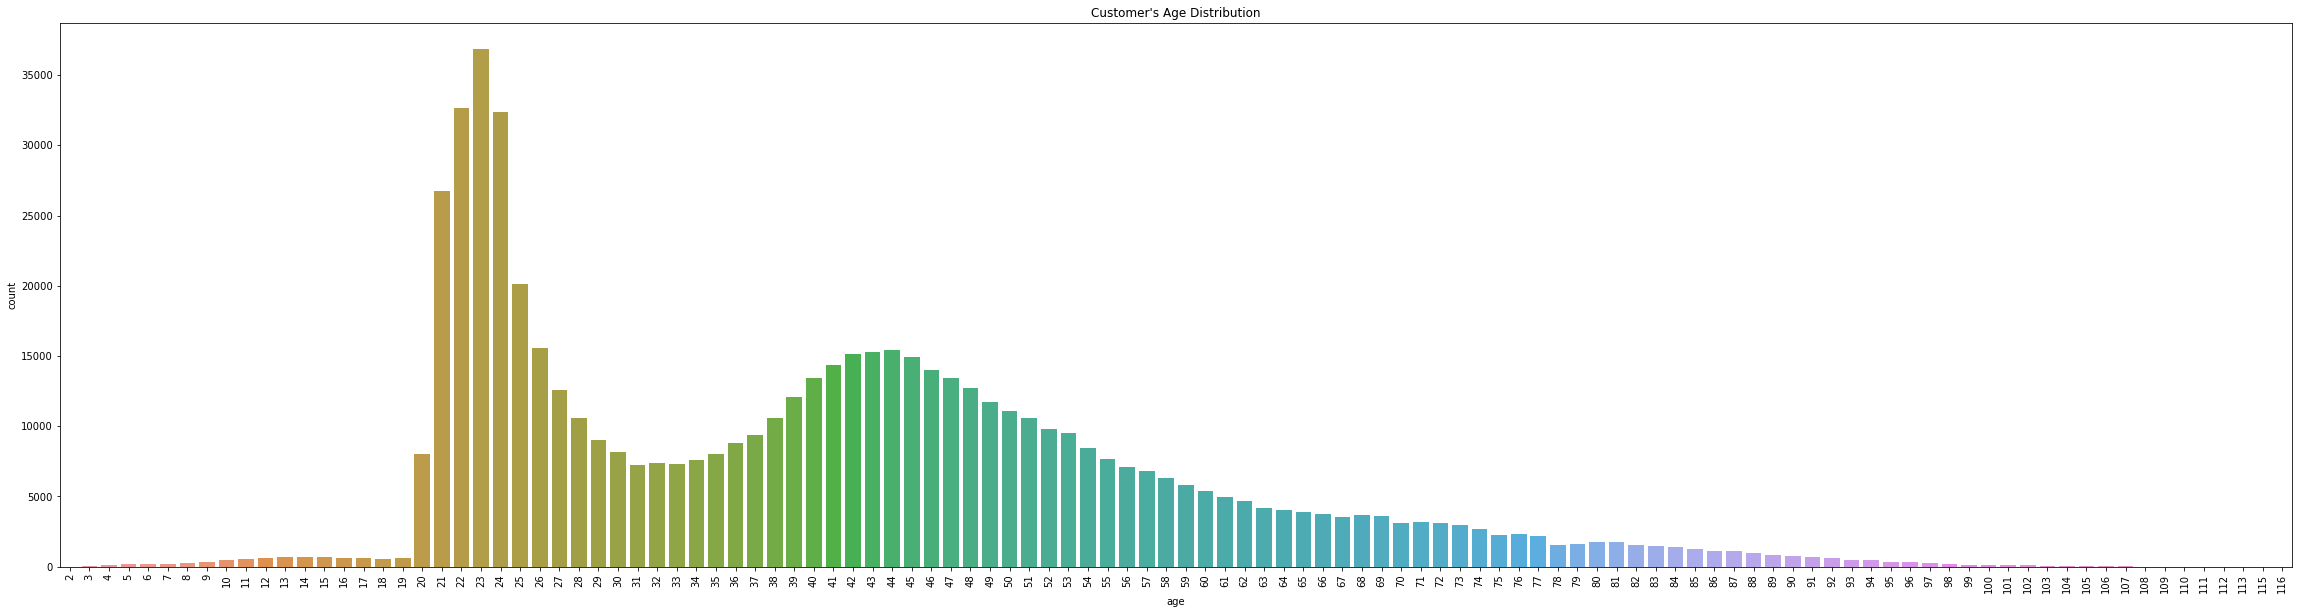

In [13]:
plt.figure(figsize=(40, 10))
graphic=sns.countplot(x =df['age'], data = df);
plt.xticks(rotation=90);
graphic.set_title("Customer's Age Distribution");

The distribution is quite high between the ages of 20-30.

#### `cust_gender`: Customer's Gender

In [14]:
df.cust_gender.replace({"H" : "M", 
                           "V": "F"}, inplace=True)
pd.unique(df["cust_gender"])

array(['M', 'F'], dtype=object)

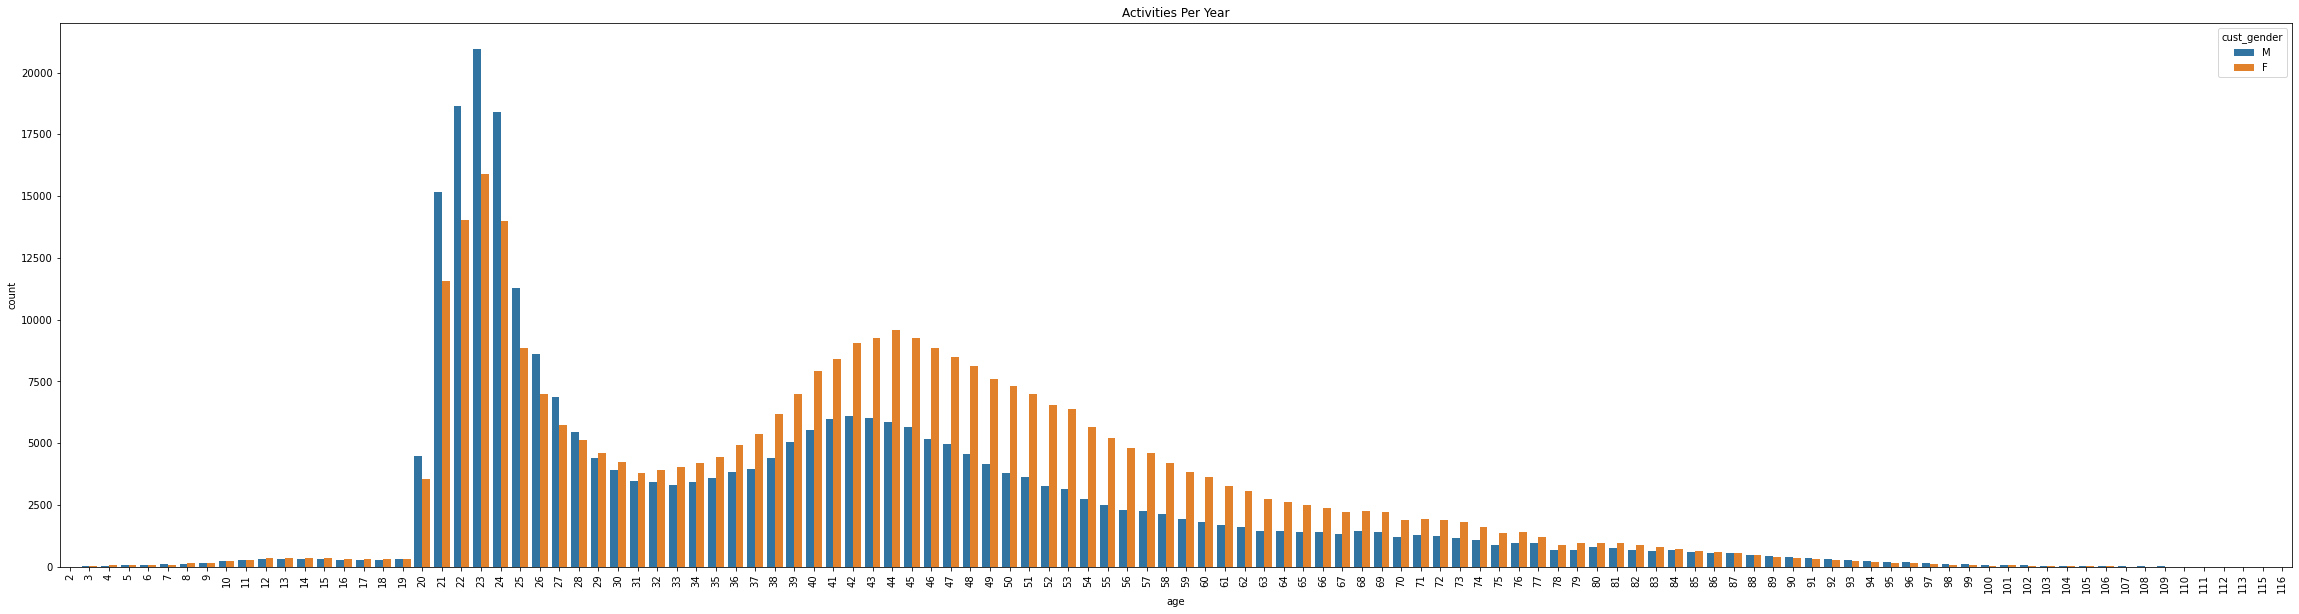

In [15]:
plt.figure(figsize=(40, 10))
fig=sns.countplot(x="age",hue="cust_gender", data=df)
plt.xticks(rotation=90);
fig.set_title("Activities Per Year");

"F" category is higher in proportion compared to "M"

#### `emp_index`: Employee index

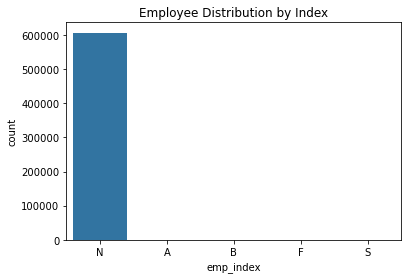

In [16]:
graphic=sns.countplot(x =df["emp_index"], data = df);
plt.rcParams["figure.figsize"] = (20,10)
graphic.set_title("Employee Distribution by Index");

Employee index: 
* A: active, 
* B: ex employed, 
* F: filial, 
* N: not employee, 
* P: pasive

Almost all customers are not employee. Only a small negligible portion of customers belong to other categories. 


99.4% of customers are from Spain.

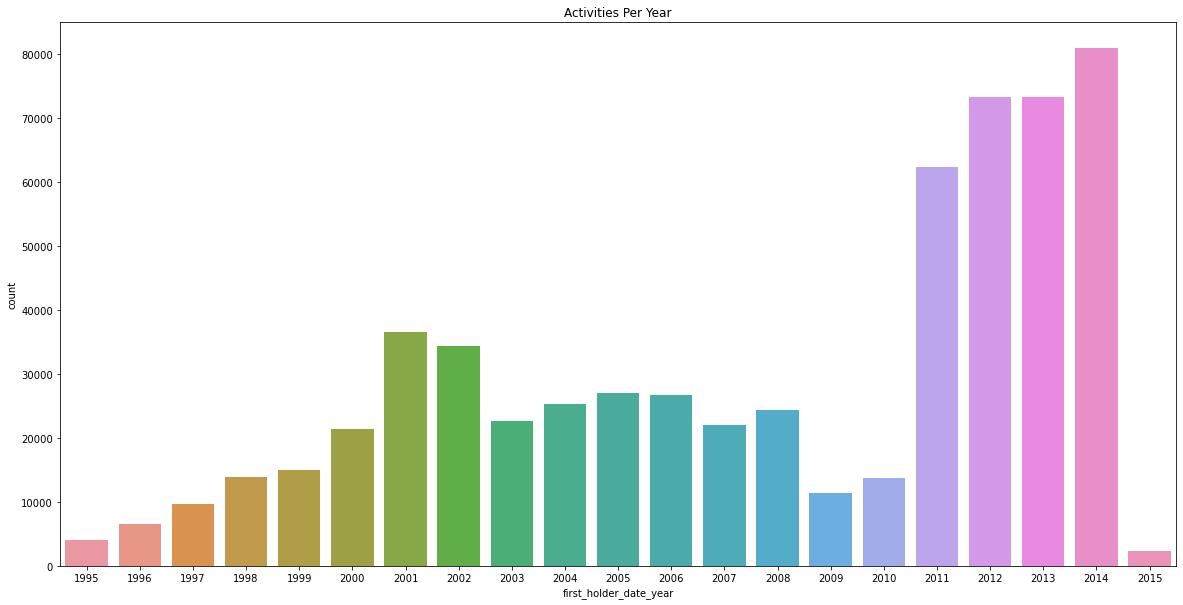

In [17]:
graphic=sns.countplot(x="first_holder_date_year", data=df)
graphic.set_title("Activities Per Year");

Years between 2011 and 2014 saw the highest number of applicants compared to other years.

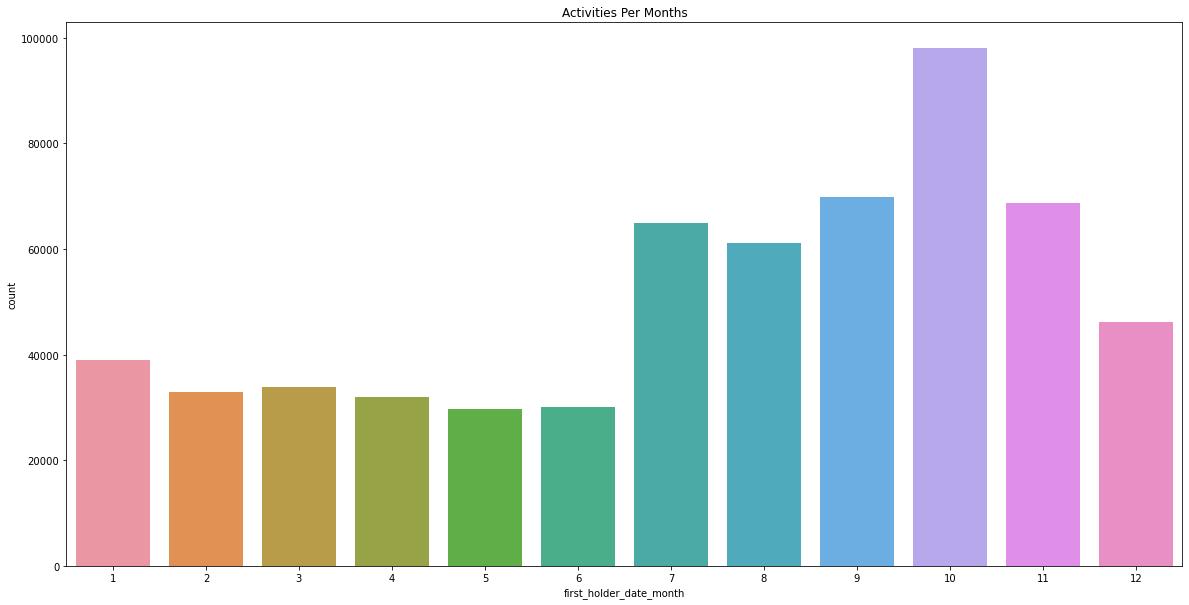

In [18]:
graphic=sns.countplot(x="first_holder_date_month", data=df)
graphic.set_title("Activities Per Months");

For all years, most customers join during the month of October.

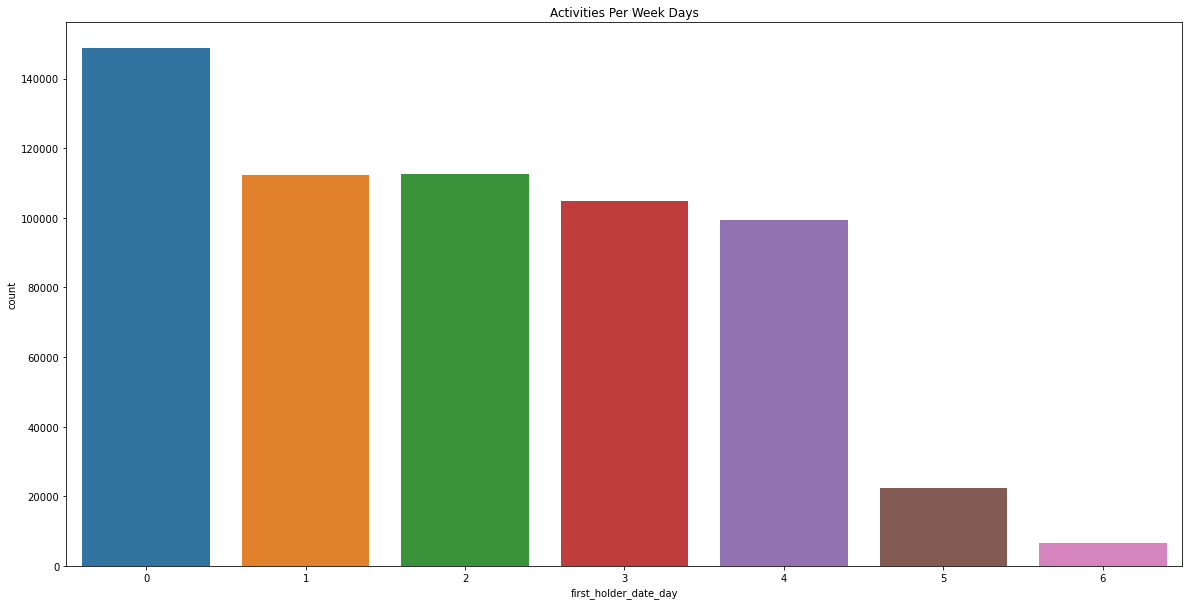

In [19]:
graphic=sns.countplot(x="first_holder_date_day", data=df)
graphic.set_title("Activities Per Week Days");

For all years, the most weekly activity has been on Monday.

#### `new_cust_index`: New customer Index. 1 if the customer registered in the last 6 months.

In [20]:
df["new_cust_index"].value_counts()

0.0    606254
1.0       370
Name: new_cust_index, dtype: int64

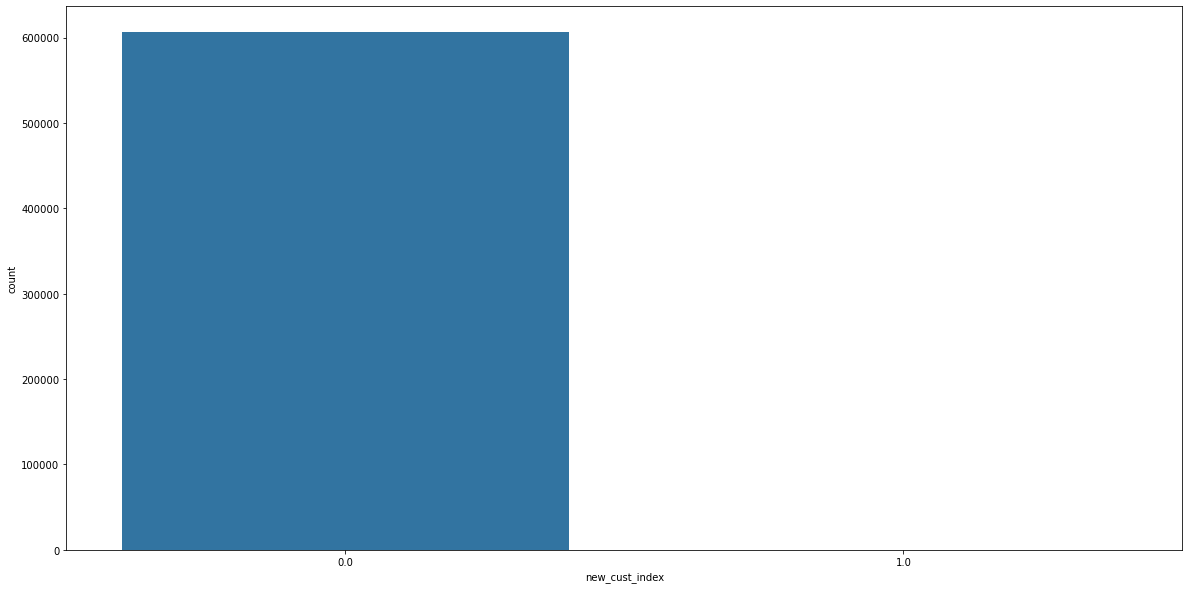

In [21]:
graphic=sns.countplot(x="new_cust_index", data=df)

#### `cust_seniority`: Customer seniority (in months)

In [22]:
df["cust_seniority"].value_counts()

21     18619
12     17699
10     16019
33     15139
45     13998
9      13870
23     12880
44     11565
36     11470
35     11385
34     11263
32     10617
24      9879
46      9826
22      9693
8       9358
20      8979
43      8416
47      7760
48      5988
11      5657
162     5049
164     4853
165     4488
161     4276
31      4273
81      4203
16      4109
117     3822
19      3743
160     3652
159     3569
18      3504
172     3452
163     3369
7       3259
156     3191
166     3027
105     3009
169     2998
80      2780
13      2697
104     2676
168     2669
102     2650
134     2620
17      2560
125     2532
137     2524
110     2522
119     2514
174     2494
138     2478
171     2446
107     2438
177     2413
118     2411
157     2374
126     2349
170     2347
128     2334
14      2325
30      2293
93      2277
151     2249
150     2233
184     2219
173     2218
63      2185
108     2184
136     2176
15      2164
82      2158
140     2154
114     2153
109     2153
180     2148

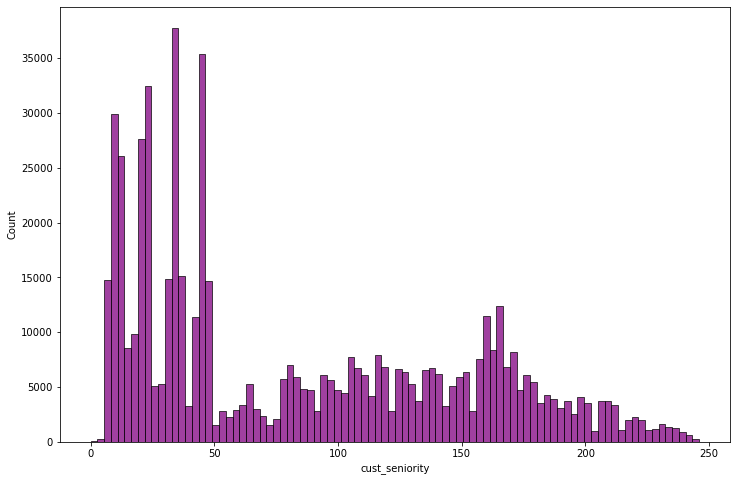

In [23]:
color = ["purple"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (12,8))
sns.histplot(x="cust_seniority", data=df);

#### `indrel`: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

1.0    605853
0.0       771
Name: indrel, dtype: int64


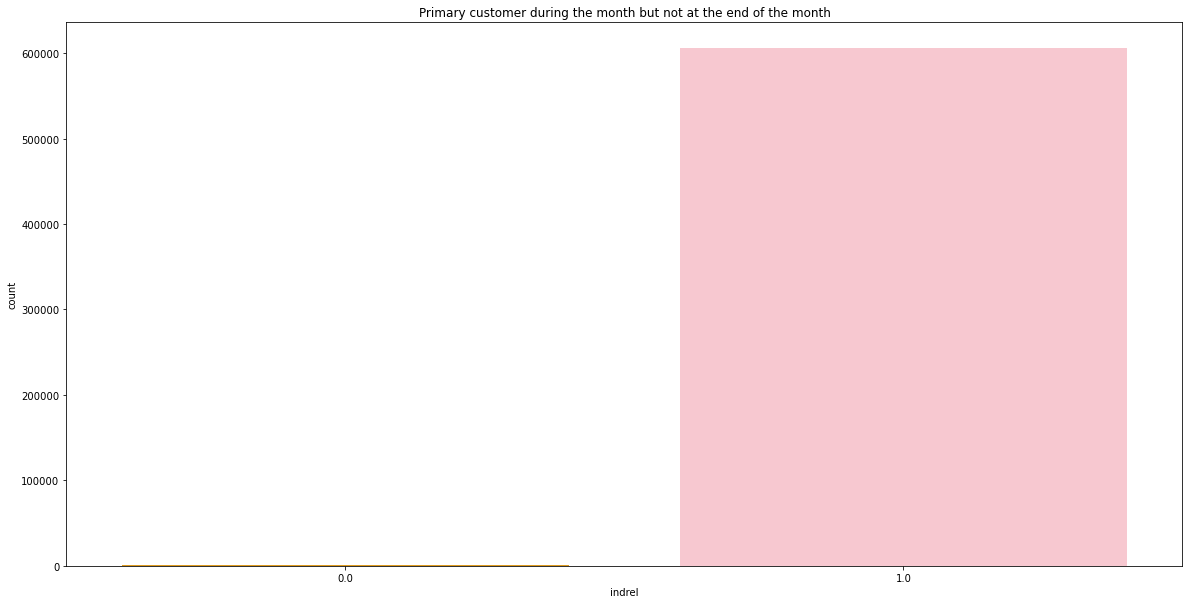

In [24]:
color = ["orange","pink"]
print(df["indrel"].value_counts())
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(x="indrel", data = df);
plt.rcParams["figure.figsize"] = (8,4)
grap1.set_title("Primary customer during the month but not at the end of the month");

#### **cust_type** : Customer type at the beginning of the month: 1 (First/Primary customer)

In [25]:
df["cust_type"].value_counts()

1.0    606624
Name: cust_type, dtype: int64

#### `cust_rel_time`: Customer relation type at the beginning of the month, A (active), I (inactive)

A    321900
I    284724
Name: cust_rel_time, dtype: int64


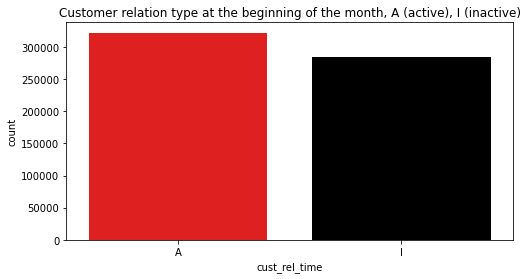

In [26]:
color = ["red","black"]
print(df["cust_rel_time"].value_counts())
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(x="cust_rel_time", data = df);
plt.rcParams["figure.figsize"] = (8,4)
grap1.set_title("Customer relation type at the beginning of the month, A (active), I (inactive)");

#### `cust_res_index`: Residence index (S : 1 (Yes) or N: 0 (No) if the residence country is the same than the bank country)

1    602986
0      3638
Name: cust_res_index, dtype: int64


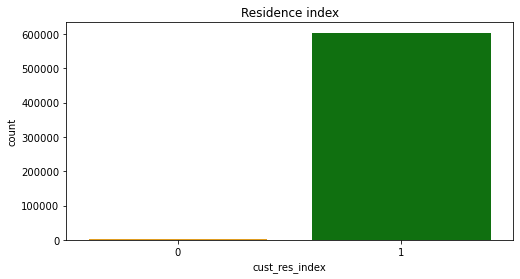

In [27]:
print(df["cust_res_index"].value_counts())
color = ["orange","green"]
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(x="cust_res_index", data = df);

plt.rcParams["figure.figsize"] = (5,4)
grap1.set_title("Residence index");

Country of residence bank country is the same as most people

#### `is_foreign`: Foreigner index (S : 1 (Yes) or N: 0 (No) if the customer's birth country is different than the bank country)

0    579688
1     26936
Name: is_foreign, dtype: int64


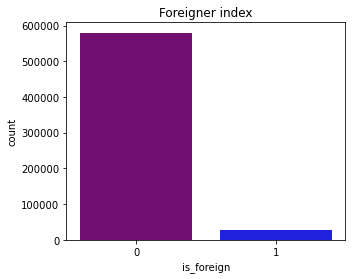

In [28]:
print(df["is_foreign"].value_counts())
color = ["purple","blue"]
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(x="is_foreign", data = df);

plt.rcParams["figure.figsize"] = (5,4)
grap1.set_title("Foreigner index");

#### `channel_to_join`: channel used by the customer to join

In [29]:
df["channel_to_join"].value_counts()

KHE    200570
KAT    165272
KFC    147120
KFA     20854
KHD      5756
KHK      5622
KAS      4098
KAG      3800
KAA      3207
RED      3113
KAY      3066
KAB      3018
KCC      2468
KAE      2415
KBZ      2213
KFD      1985
KAI      1806
KEY      1685
KAW      1653
KAF      1560
KAR      1503
013      1490
KAZ      1418
KAH      1209
KCI      1152
007      1001
KCH       992
KAJ       972
KHF       823
KAQ       794
KHL       717
KHC       651
KAP       619
KAD       560
KAM       514
KFP       426
KGX       415
KGV       414
KAC       388
KEJ       368
KDR       355
KAL       317
KFT       315
KBH       312
KBO       312
KFG       311
KES       305
KEW       288
KAO       284
KCG       282
KFJ       252
KCB       245
KFS       241
KFF       233
KEN       218
KBQ       207
KFU       188
KFN       187
KCL       187
KGY       183
KFL       170
KFK       153
KED       145
KCM       145
KBF       145
KCD       134
KBU       130
KEL       127
KEZ       124
KDU        96
KEG        96
KBG   

#### `deceased_index`: Deceased index. N/S: 0/1

In [30]:
df["deceased_index"].value_counts()

0    605038
1      1586
Name: deceased_index, dtype: int64

#### `activity_index`: Activity index (1, active customer; 0, inactive customer)

In [31]:
df["activity_index"].value_counts()

1.0    330555
0.0    276069
Name: activity_index, dtype: int64

1.0    330555
0.0    276069
Name: activity_index, dtype: int64


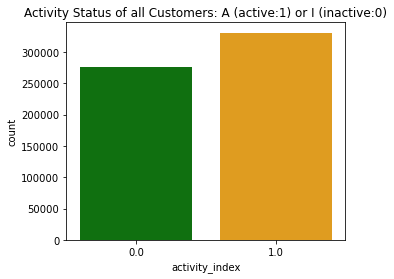

In [32]:
print(df["activity_index"].value_counts())
color = ["green","orange"]
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(x="activity_index", data = df);

plt.rcParams["figure.figsize"] = (7,6)
grap1.set_title("Activity Status of all Customers: A (active:1) or I (inactive:0)");


#### `cod_prov` & `name_province`: Province code (customer's address) / Province name

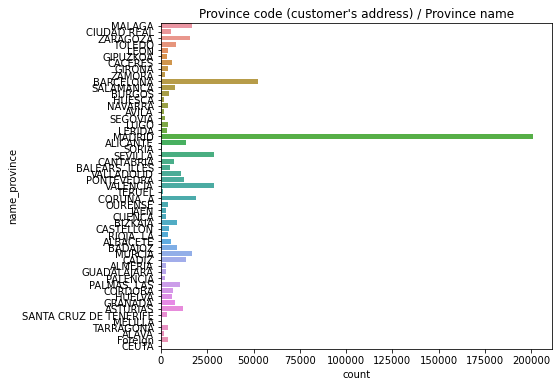

In [33]:
color = ["pink","yellow"]
sns.set_palette(sns.color_palette(color))
grap1= sns.countplot(y="name_province", data = df);

plt.rcParams["figure.figsize"] = (18,16)
grap1.set_title("Province code (customer's address) / Province name");

The vast majority are in Madrid and Barcelona.

#### `household_income`: Gross income of the household

In [34]:
df["cust_residence"].value_counts()

Spain           602986
Europe            1740
Asia              1178
NorthAmerica       477
SouthAmerica       113
Africa             103
Oceania             27
Name: cust_residence, dtype: int64

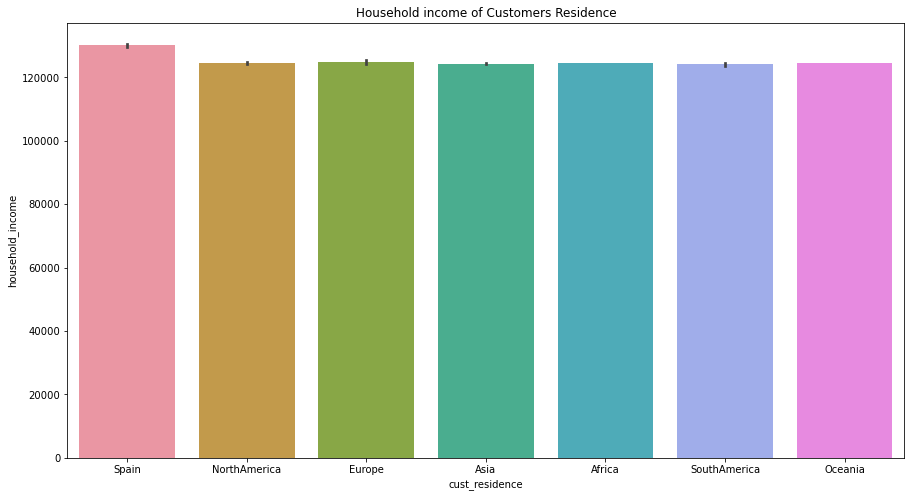

In [35]:
plt.figure(figsize = (15,8))
cities_ = sns.barplot(x="cust_residence",y="household_income", data=df);
cities_ .set_title("Household income of Customers Residence");

Although the number of customers by country is mostly in Spain, there are high-income customers in other countries.

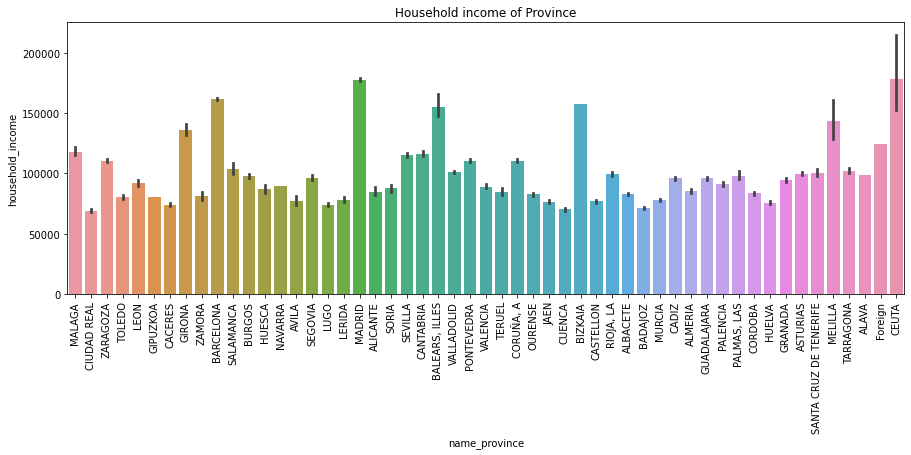

In [36]:
plt.figure(figsize = (15,5))
cities_ = sns.barplot(x="name_province",y="household_income", data=df);
plt.setp(cities_.get_xticklabels(), rotation=90);
cities_ .set_title("Household income of Province");

In [37]:
df_corr = df.copy()
df_corr.head()

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,M,35,0.0,6,1.0,1.0,A,1,0,KHL,0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,F,23,0.0,35,1.0,1.0,I,1,1,KHE,0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,F,23,0.0,35,1.0,1.0,I,1,0,KHE,0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,M,22,0.0,35,1.0,1.0,I,1,0,KHD,0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,F,23,0.0,35,1.0,1.0,A,1,0,KHE,0,ZARAGOZA,1.0,100700.64,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,2


In [38]:
df_corr = df_corr[["age",
                  "new_cust_index",
                  "cust_seniority",
                  "indrel",
                  "cust_type",
                  "cust_rel_time",
                  "cust_res_index",
                  "is_foreign",
                  "deceased_index",
                  "activity_index",
                  "household_income",
                  "total_accounts"]]
df_corr.head()

,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,deceased_index,activity_index,household_income,total_accounts
0,35,0.0,6,1.0,1.0,A,1,0,0,1.0,87218.10,1.0
1,23,0.0,35,1.0,1.0,I,1,1,0,0.0,35548.74,1.0
2,23,0.0,35,1.0,1.0,I,1,0,0,0.0,122179.11,1.0
3,22,0.0,35,1.0,1.0,I,1,0,0,0.0,119775.54,1.0
4,23,0.0,35,1.0,1.0,A,1,0,0,1.0,100700.64,1.0


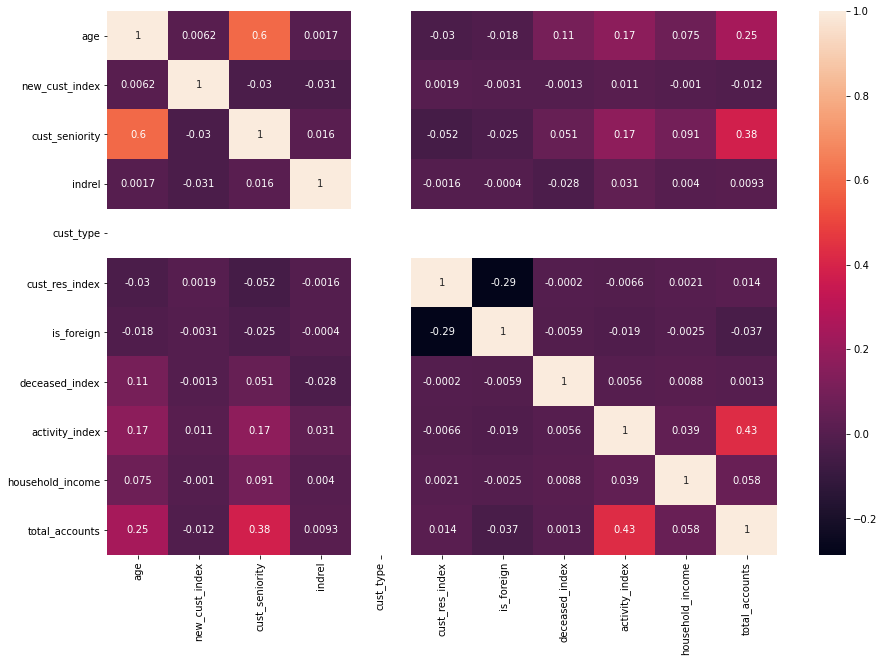

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(df_corr.corr(), annot = True);

### Popularity of products by customers gender and activity index

In [40]:
df1 = df.loc[:, ["cust_gender", "activity_index"]].join(df.loc[:, "saving_acc": "direct_debit"])
df1 = df1.groupby(["cust_gender", "activity_index"]).sum()
df1 = df1.T
df1.head()

cust_gender            F                   M          
activity_index       0.0       1.0       0.0       1.0
saving_acc          16.0      50.0       8.0      15.0
guarantees           0.0      14.0       0.0       6.0
current_acc     112649.0  142396.0  114632.0  102797.0
derivada_acc        22.0     236.0       7.0      35.0
payroll_acc        594.0   34831.0     441.0   23331.0

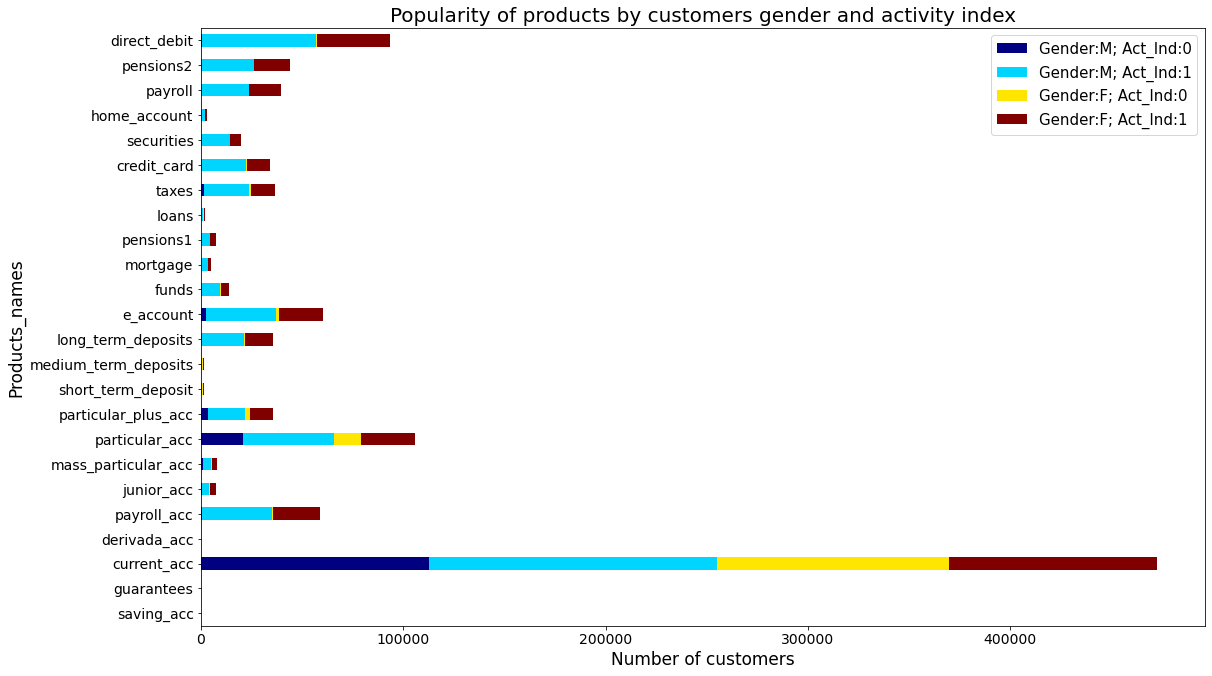

In [41]:
df1.plot(kind='barh', stacked=True, fontsize=14, figsize=[18,11], colormap="jet")
plt.title("Popularity of products by customers gender and activity index", fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Gender:M; Act_Ind:0", 
            "Gender:M; Act_Ind:1", 
            "Gender:F; Act_Ind:0", 
            "Gender:F; Act_Ind:1"], prop={'size':15});

In [42]:
prod_cols = ['saving_acc', 
             'guarantees', 
             'current_acc',
             'derivada_acc', 
             'payroll_acc', 
             'junior_acc',
             'mass_particular_acc',
             'particular_acc',
             'particular_plus_acc',
             'short_term_deposit', 
             'medium_term_deposits',
             'long_term_deposits', 
             'e_account',
             'funds',
             'mortgage',
             'pensions1', 
             'loans',
             'taxes',
             'credit_card',
             'securities',
             'home_account', 
             'payroll', 
             'pensions2',
             'direct_debit']

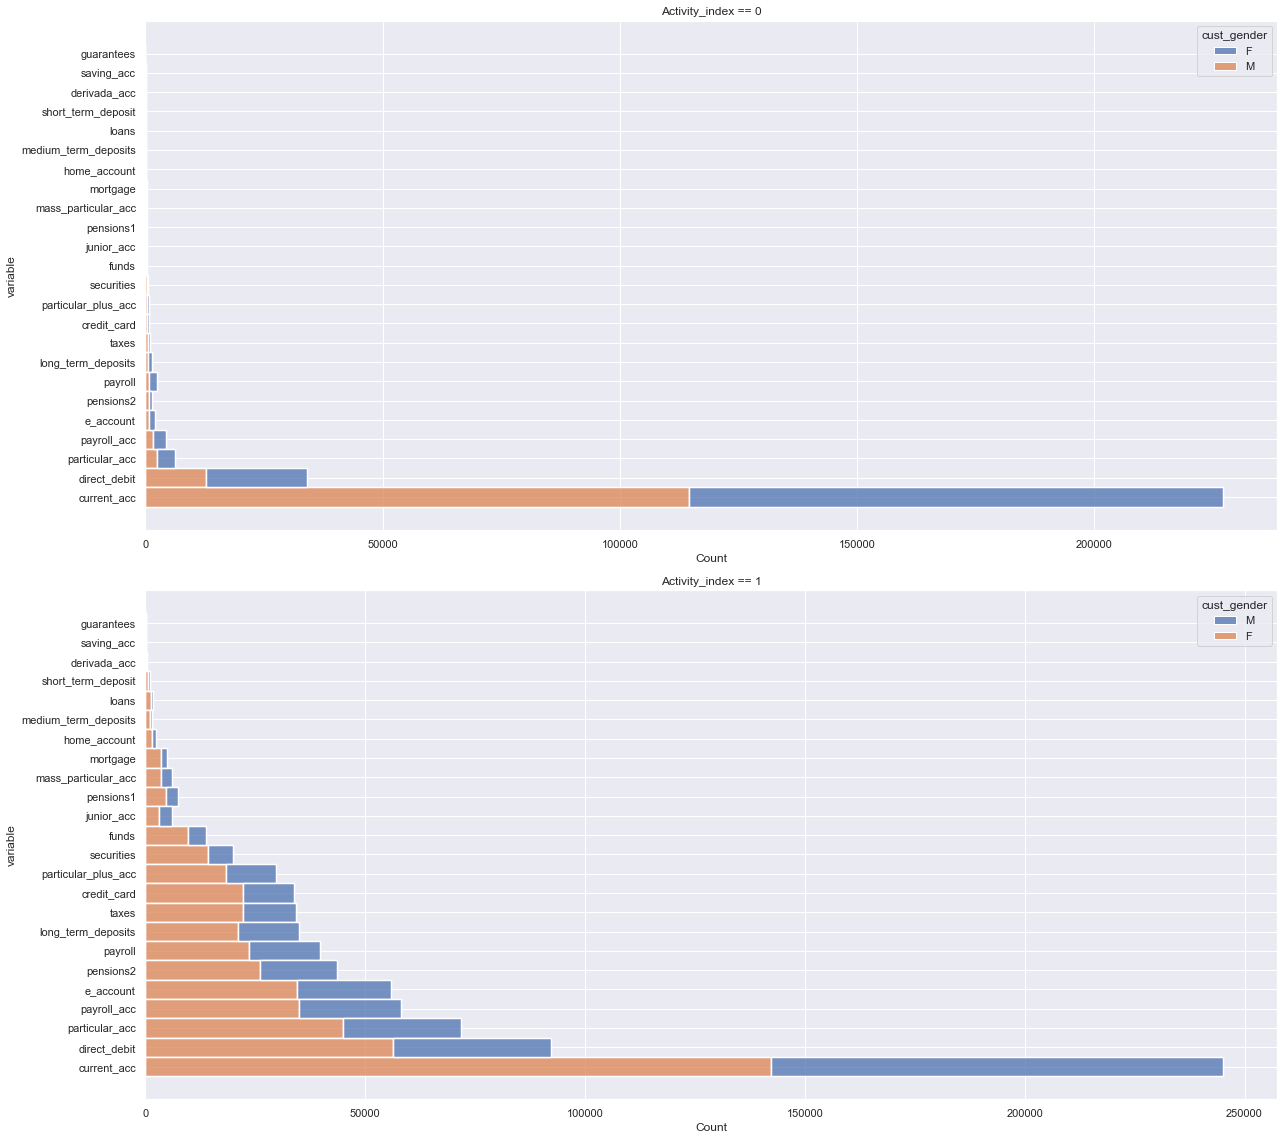

In [43]:
new_df = df.groupby(['cust_gender', 'activity_index']).agg({col : 'sum' for col in prod_cols}).reset_index()


new_df = new_df.melt(id_vars = ["cust_gender", "activity_index"])
new_df = new_df.sort_values("value")


sns.set()

fig, ax = plt.subplots(2,1, sharey = True, tight_layout = True)

sns.histplot(new_df.query("activity_index == 0"), y='variable', hue='cust_gender', weights='value',
             multiple='stack', ax = ax[0]).set_title("Activity_index == 0");

sns.histplot(new_df.query("activity_index == 1"), y='variable', hue='cust_gender', weights='value',
             multiple='stack', ax = ax[1]).set_title("Activity_index == 1");

Most of the customers used only one product which is the current account.

### Number of products by age

In [44]:
df2 = df.groupby(["age"])["total_accounts"].agg("sum")

Text(0, 0.5, 'Number of products')

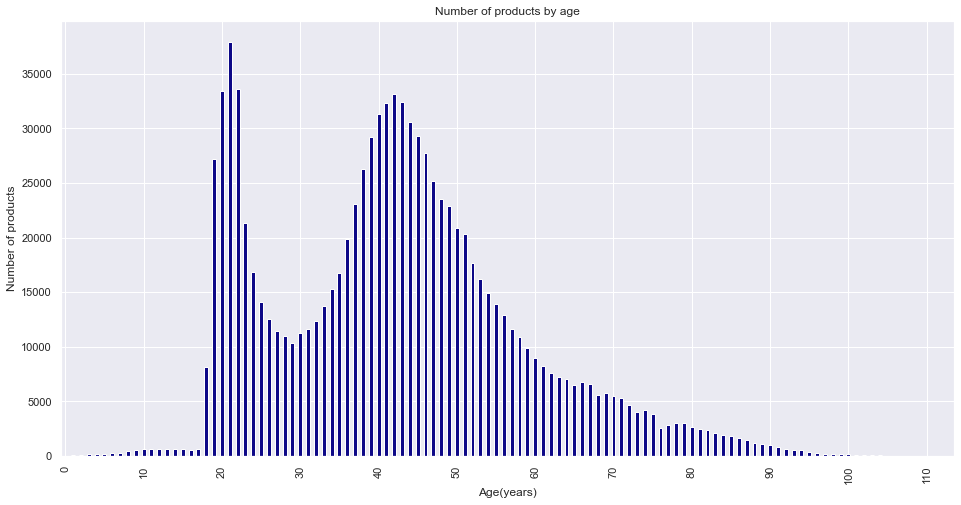

In [45]:
plt.figure(figsize=(16,8))
df2.plot(kind="bar", colormap="plasma", legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title("Number of products by age") 
plt.xlabel("Age(years)")
plt.ylabel("Number of products") 

### Total number of products by income

In [46]:
df3 = df.copy()

In [47]:
bins = [0.0, 60000.0, 120000.0, 180000.0, 240000.0, np.inf]
label = ['low', 'low-middle', 'middle', 'upper-middle', 'high']

df3['income_levels'] = pd.cut(df3.household_income, bins = bins, labels = label)

In [48]:
df3 = df3.loc[:, ["income_levels"]].join(df.loc[:, "saving_acc": "direct_debit"])
df3 = df3.groupby(["income_levels"]).sum()
df3 = df3.T
df3.head()

income_levels,low,low-middle,middle,upper-middle,high
saving_acc,7.0,22.0,29.0,15.0,16.0
guarantees,1.0,3.0,4.0,8.0,4.0
current_acc,75153.0,221168.0,105584.0,34960.0,35609.0
derivada_acc,33.0,114.0,80.0,37.0,36.0
payroll_acc,6417.0,24090.0,16412.0,6271.0,6007.0


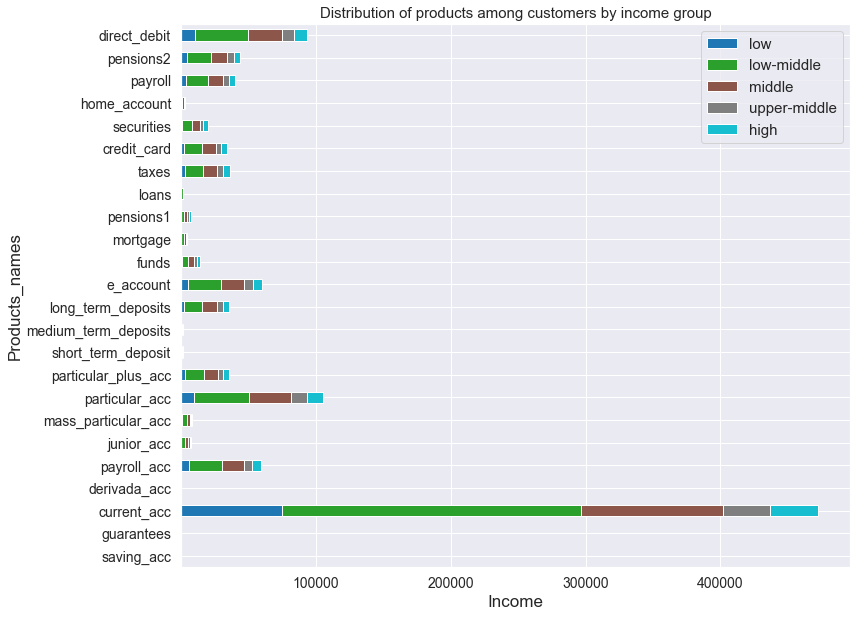

In [49]:
df3.plot(kind="barh", stacked=True, fontsize=14, figsize=[12,10], colormap="tab10")
plt.title("Distribution of products among customers by income group", fontsize=15) 
plt.xlabel('Income', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(prop={'size':15}, loc=1);

In [50]:
exclude = ["current_acc"]
df3 = df3.T
df3 = df3.drop(exclude, axis=1).T
df.head()

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,total_accounts,dup_rows_count
0,N,Spain,M,35,0.0,6,1.0,1.0,A,1,0,KHL,0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2015,1,0,1.0,1
1,N,Spain,F,23,0.0,35,1.0,1.0,I,1,1,KHE,0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
2,N,Spain,F,23,0.0,35,1.0,1.0,I,1,0,KHE,0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
3,N,Spain,M,22,0.0,35,1.0,1.0,I,1,0,KHD,0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,1
4,N,Spain,F,23,0.0,35,1.0,1.0,A,1,0,KHE,0,ZARAGOZA,1.0,100700.64,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,1.0,2


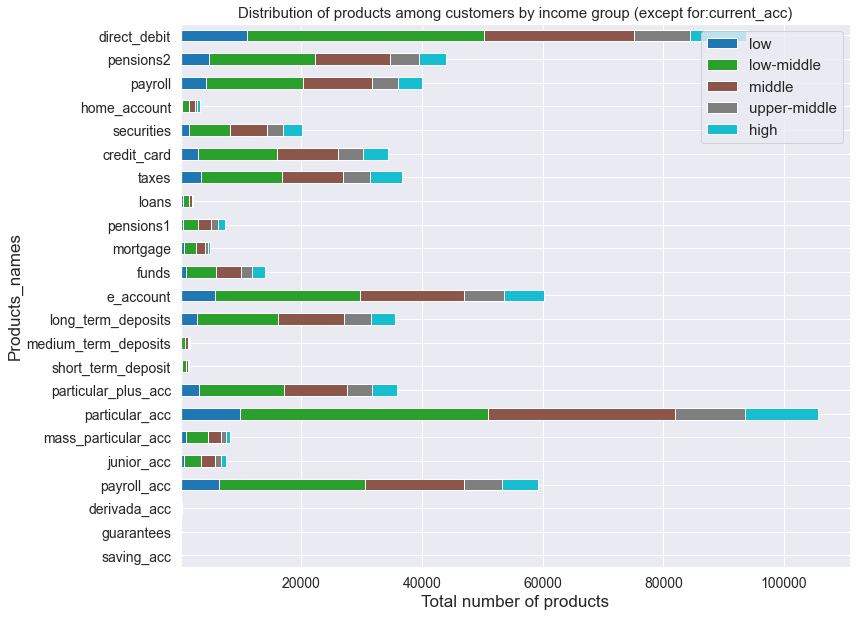

In [51]:
df3.plot(kind="barh", stacked=True, fontsize=14, figsize=[12,10], colormap="tab10")
plt.title("Distribution of products among customers by income group (except for:current_acc)", fontsize=15) 
plt.xlabel('Total number of products', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(prop={'size':15}, loc=1);

 In order to investigate the other products, let's exclude the dominant product (current account).

### Plot of customers' age distibution of each product 

In [52]:
df4 = df.copy()

In [53]:
bins = [0, 12, 19, 39, 59, np.inf]
label = ["junior", "teenager", "adult", "middle_age_adult", "senior_adult"]

df4['age_levels'] = pd.cut(df4.age, bins = bins, labels = label)

In [54]:
df4 = df4.loc[:, ["age_levels"]].join(df4.loc[:, "saving_acc": "direct_debit"])
df4 = df4.groupby(["age_levels"]).sum()
df4 = df4.T
df4.head()

age_levels,junior,teenager,adult,middle_age_adult,senior_adult
saving_acc,0.0,0.0,3.0,80.0,6.0
guarantees,0.0,0.0,5.0,14.0,1.0
current_acc,1.0,12.0,260318.0,153642.0,58501.0
derivada_acc,0.0,0.0,34.0,199.0,67.0
payroll_acc,0.0,0.0,18276.0,34661.0,6260.0


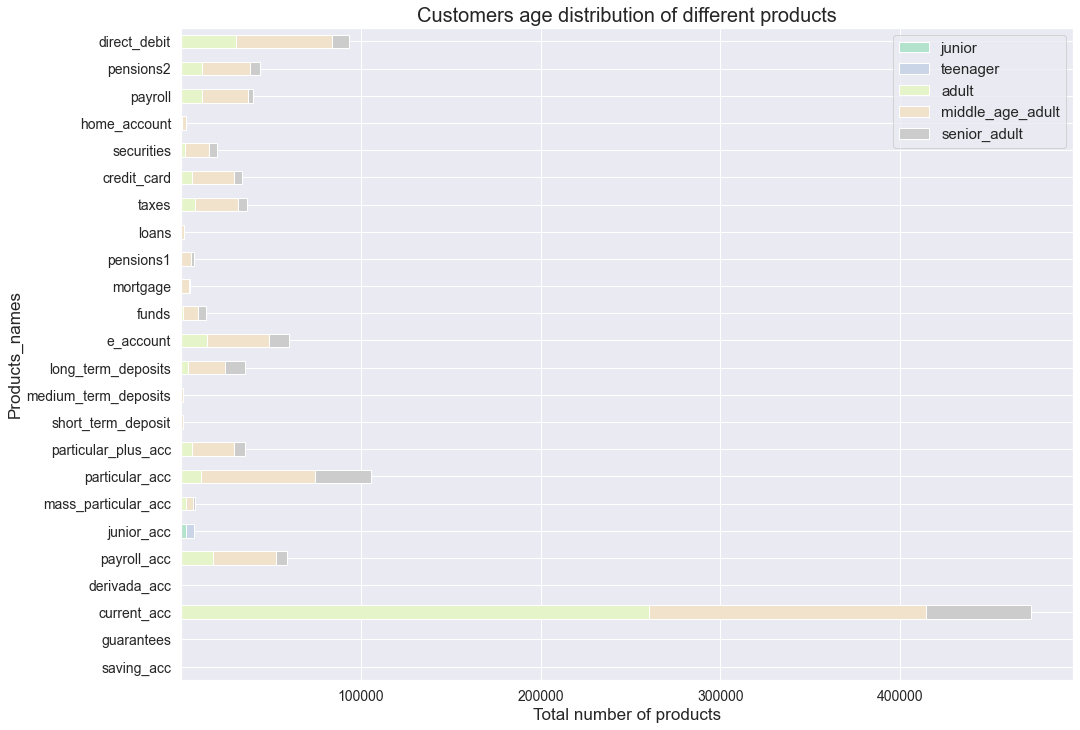

In [55]:
df4.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap="Pastel2")
plt.title("Customers age distribution of different products", fontsize=20) 
plt.xlabel("Total number of products", fontsize=17) 
plt.ylabel("Products_names", fontsize=17) 
plt.legend(prop={'size':15}, loc=1);

In [56]:
exclude = ["current_acc"]
df4 = df4.T
df4 = df4.drop(exclude, axis=1).T
df4.head()

age_levels,junior,teenager,adult,middle_age_adult,senior_adult
saving_acc,0.0,0.0,3.0,80.0,6.0
guarantees,0.0,0.0,5.0,14.0,1.0
derivada_acc,0.0,0.0,34.0,199.0,67.0
payroll_acc,0.0,0.0,18276.0,34661.0,6260.0
junior_acc,2901.0,4333.0,292.0,0.0,0.0


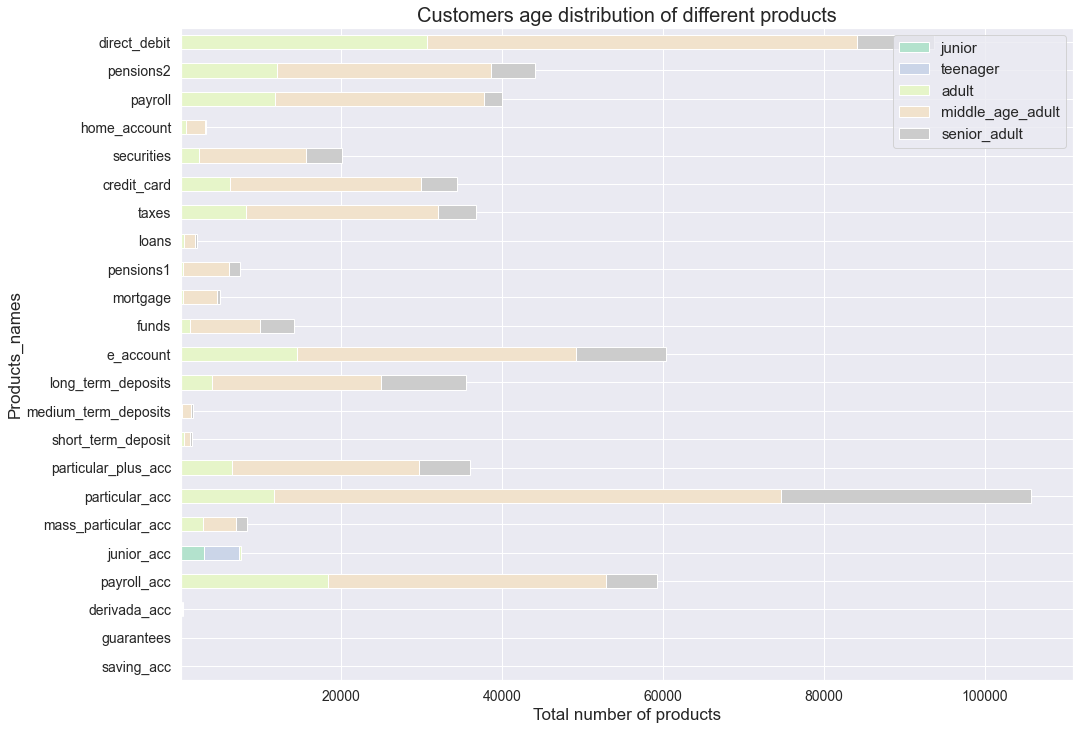

In [57]:
df4.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap="Pastel2")
plt.title("Customers age distribution of different products", fontsize=20) 
plt.xlabel("Total number of products", fontsize=17) 
plt.ylabel("Products_names", fontsize=17) 
plt.legend(prop={'size':15}, loc=1);

### Years' distribution of different products

In [58]:
df5=df.copy()

In [59]:
bins = [1995.0, 2000.0, 2005.0, 2010.0, 2015.0]
label = ["1995-2000", "2001-2005", "2006-2010", "2011-2015"]

df5["years_product"] = pd.cut(df5.first_holder_date_year, bins = bins, labels = label)

In [60]:
df5 = df5.loc[:, ["years_product"]].join(df5.loc[:, "saving_acc": "direct_debit"])
df5 = df5.groupby(["years_product"]).sum()
df5 = df5.T
df5.head()

years_product,1995-2000,2001-2005,2006-2010,2011-2015
saving_acc,25.0,59.0,3.0,0.0
guarantees,10.0,4.0,5.0,0.0
current_acc,42783.0,93869.0,70480.0,262512.0
derivada_acc,80.0,125.0,73.0,13.0
payroll_acc,14690.0,17352.0,9952.0,16306.0


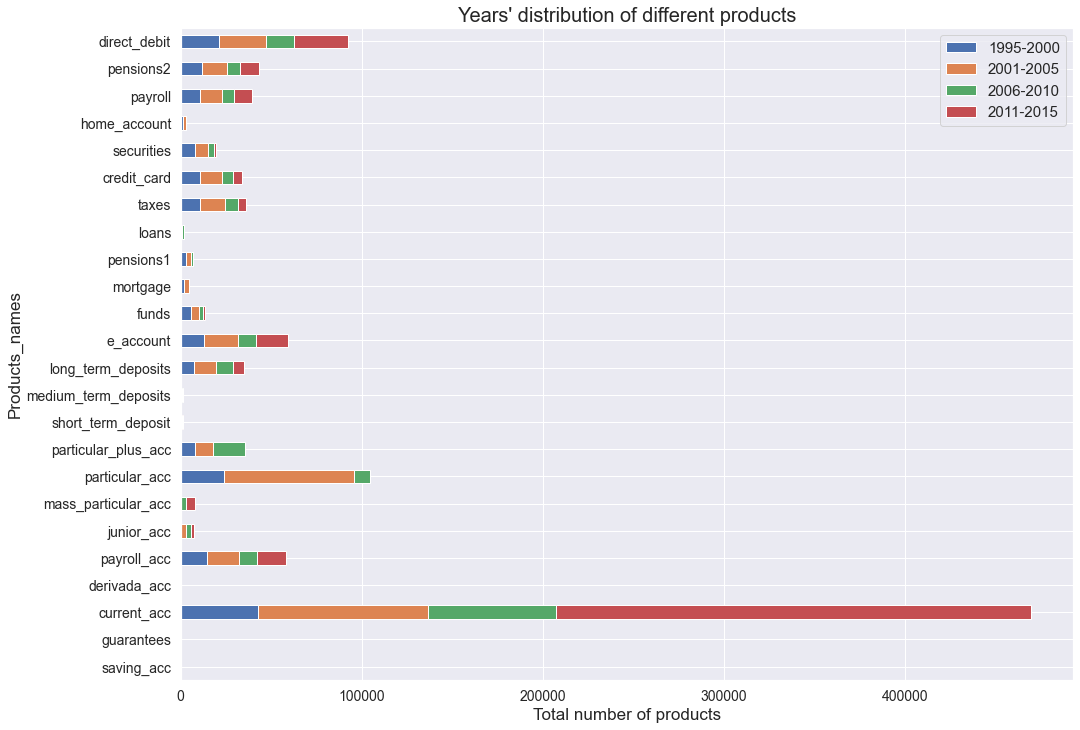

In [61]:
df5.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12])
plt.title("Years' distribution of different products", fontsize=20) 
plt.xlabel("Total number of products", fontsize=17) 
plt.ylabel("Products_names", fontsize=17) 
plt.legend(prop={'size':15}, loc=1);

In [62]:
exclude = ["current_acc"]
df5 = df5.T
df5 = df5.drop(exclude, axis=1).T
df5.head()

years_product,1995-2000,2001-2005,2006-2010,2011-2015
saving_acc,25.0,59.0,3.0,0.0
guarantees,10.0,4.0,5.0,0.0
derivada_acc,80.0,125.0,73.0,13.0
payroll_acc,14690.0,17352.0,9952.0,16306.0
junior_acc,0.0,3014.0,2560.0,1952.0


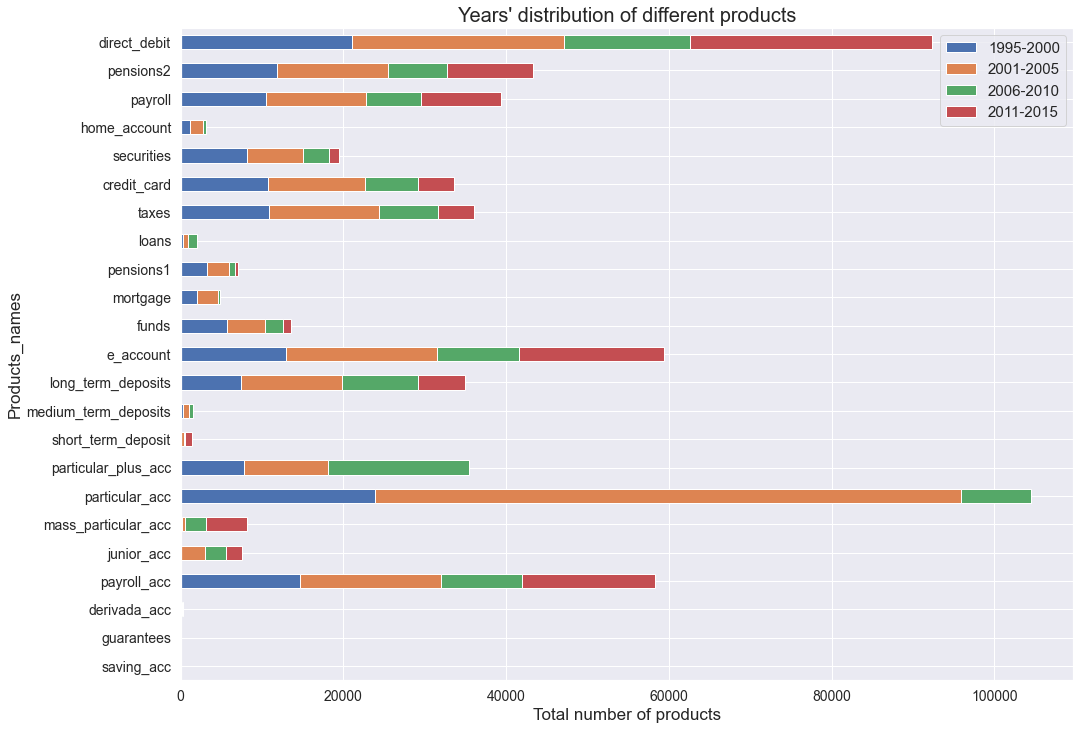

In [63]:
df5.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12])
plt.title("Years' distribution of different products", fontsize=20) 
plt.xlabel("Total number of products", fontsize=17) 
plt.ylabel("Products_names", fontsize=17) 
plt.legend(prop={'size':15}, loc=1);